Step 1:
Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Opening the Dataset.

In [2]:
file_path = 'updated_dataset.csv'
data = pd.read_csv(file_path)

Printing the details of the dataset.

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10485 entries, 0 to 10484
Data columns (total 28 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   CASE_NO_PATIENT'S                                   10485 non-null  int64  
 1   A1                                                  10485 non-null  int64  
 2   A2                                                  10485 non-null  int64  
 3   A3                                                  10485 non-null  int64  
 4   A4                                                  10485 non-null  int64  
 5   A5                                                  10485 non-null  int64  
 6   A6                                                  10485 non-null  int64  
 7   A7                                                  10485 non-null  int64  
 8   A8                                                  10485 non-null  int64  


In [5]:
print(data.describe())

       CASE_NO_PATIENT'S            A1            A2            A3  \
count        10485.00000  10485.000000  10485.000000  10485.000000   
mean          5243.00000      0.336004      0.272771      0.248259   
std           3026.90312      0.472363      0.445405      0.432024   
min              1.00000      0.000000      0.000000      0.000000   
25%           2622.00000      0.000000      0.000000      0.000000   
50%           5243.00000      0.000000      0.000000      0.000000   
75%           7864.00000      1.000000      1.000000      0.000000   
max          10485.00000      1.000000      1.000000      1.000000   

                 A4            A5            A6            A7            A8  \
count  10485.000000  10485.000000  10485.000000  10485.000000  10485.000000   
mean       0.275918      0.301192      0.334382      0.391226      0.272389   
std        0.446997      0.458798      0.471797      0.488048      0.445210   
min        0.000000      0.000000      0.000000      

Plotting Missing Data.

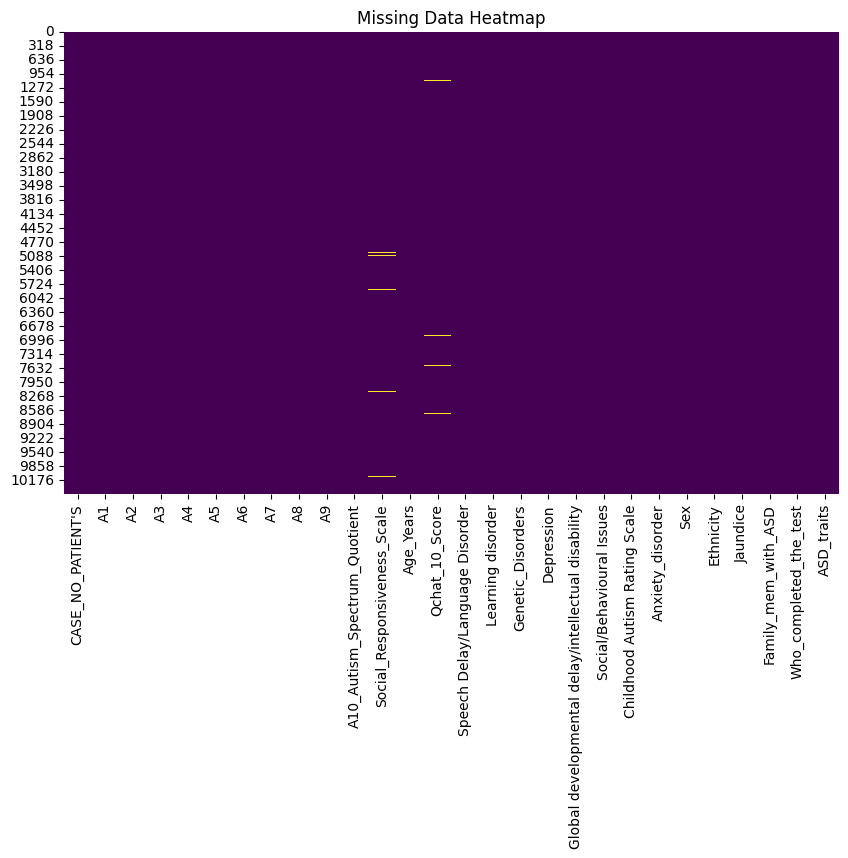

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

Plotting the distribution of the Age.

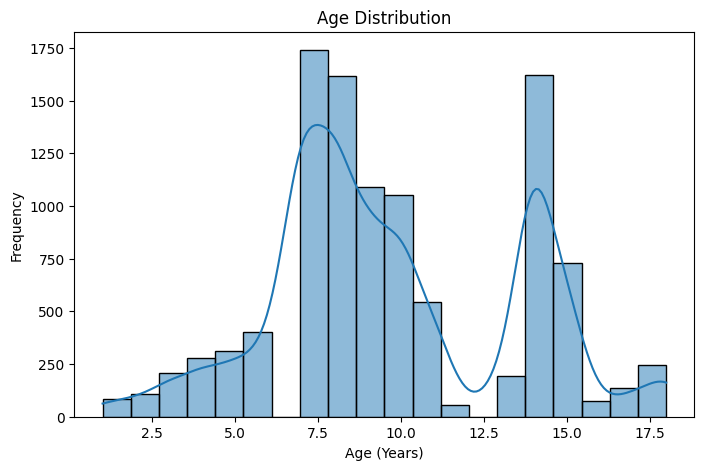

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Age_Years'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.show()

Plotting Sex Distribution.

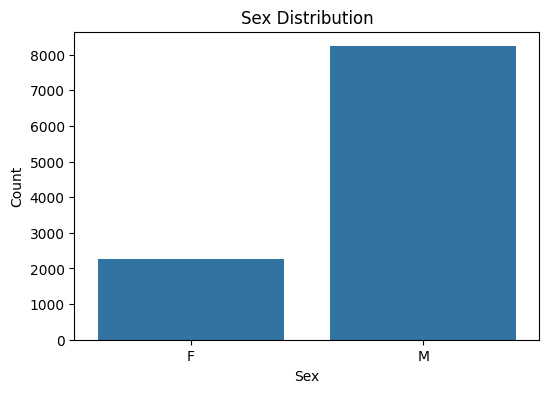

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=data)
plt.title('Sex Distribution')
plt.ylabel('Count')
plt.show()

Plotting the distribution of the answers of the 10 Questions asked to the user.

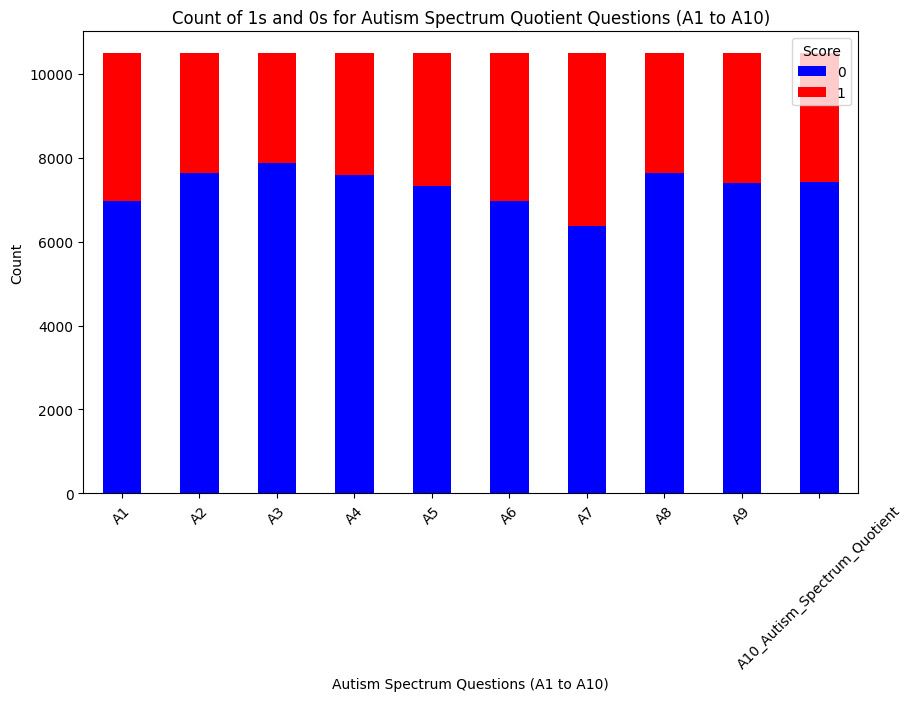

In [9]:
autism_cols = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10_Autism_Spectrum_Quotient']

autism_counts = pd.DataFrame({col: data[col].value_counts() for col in autism_cols}).T
autism_counts.fillna(0, inplace=True)  

autism_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'red'])
plt.title('Count of 1s and 0s for Autism Spectrum Quotient Questions (A1 to A10)')
plt.xlabel('Autism Spectrum Questions (A1 to A10)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Score', loc='upper right')
plt.show()


Plotting the distribution of various disorders that we are using to plot autism.

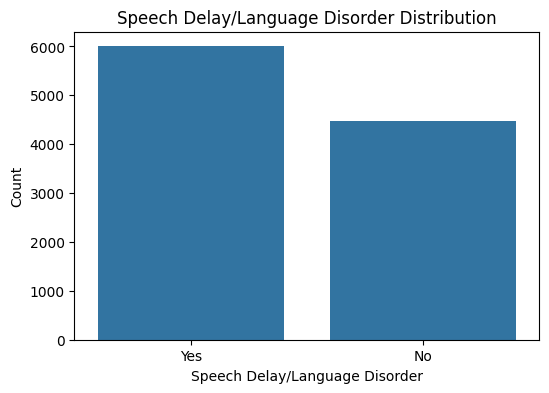

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Speech Delay/Language Disorder', data=data)
plt.title('Speech Delay/Language Disorder Distribution')
plt.ylabel('Count')
plt.show()

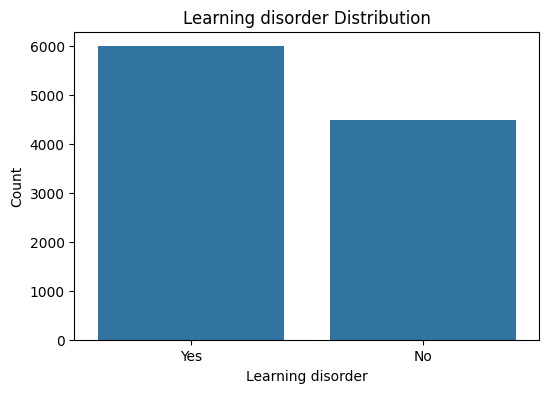

In [11]:
plt.figure(figsize=(6, 4))
title='Learning disorder'
sns.countplot(x=title, data=data)
plt.title(f'{title} Distribution')
plt.ylabel('Count')
plt.show()

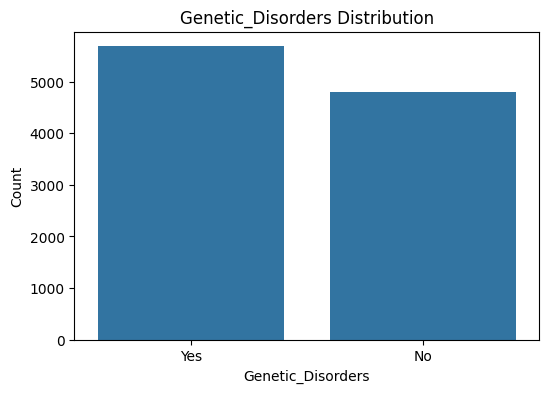

In [12]:
plt.figure(figsize=(6, 4))
title='Genetic_Disorders'
sns.countplot(x=title, data=data)
plt.title(f'{title} Distribution')
plt.ylabel('Count')
plt.show()

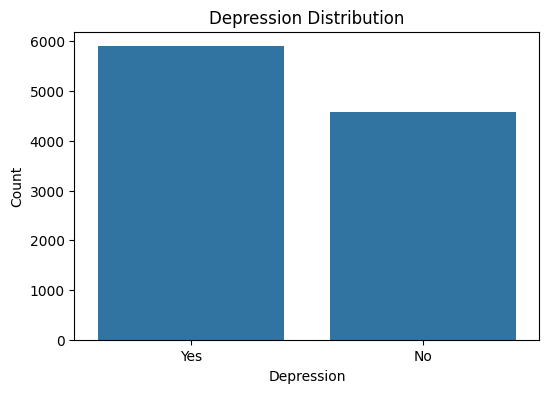

In [13]:
plt.figure(figsize=(6, 4))
title='Depression'
sns.countplot(x=title, data=data)
plt.title(f'{title} Distribution')
plt.ylabel('Count')
plt.show()

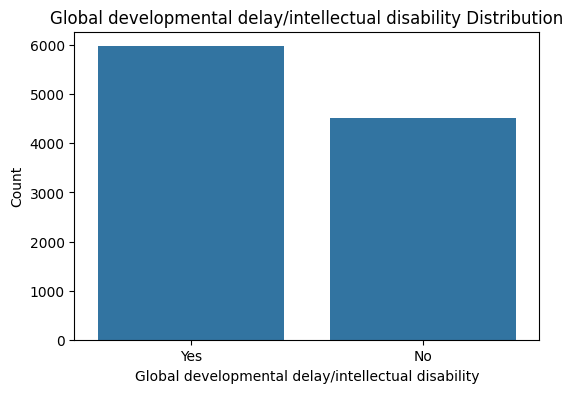

In [14]:
plt.figure(figsize=(6, 4))
title='Global developmental delay/intellectual disability'
sns.countplot(x=title, data=data)
plt.title(f'{title} Distribution')
plt.ylabel('Count')
plt.show()

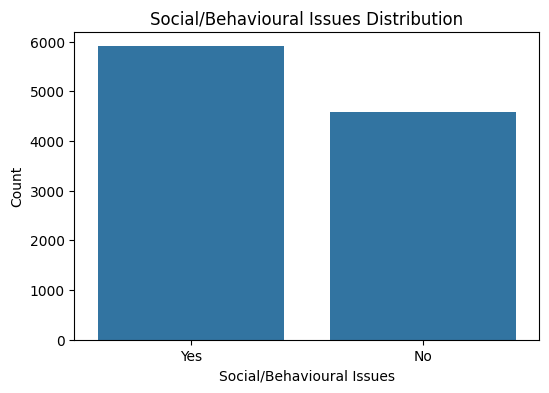

In [15]:
plt.figure(figsize=(6, 4))
title='Social/Behavioural Issues'
sns.countplot(x=title, data=data)
plt.title(f'{title} Distribution')
plt.ylabel('Count')
plt.show()

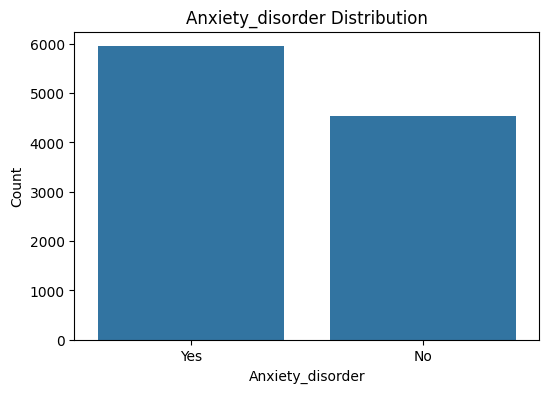

In [16]:
plt.figure(figsize=(6, 4))
title='Anxiety_disorder'
sns.countplot(x=title, data=data)
plt.title(f'{title} Distribution')
plt.ylabel('Count')
plt.show()

Plotting the distribution of Ethnicities.

C:\Users\Meheraab\AppData\Local\Temp\ipykernel_18744\3189552307.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Ethnicity'], palette='Set3')


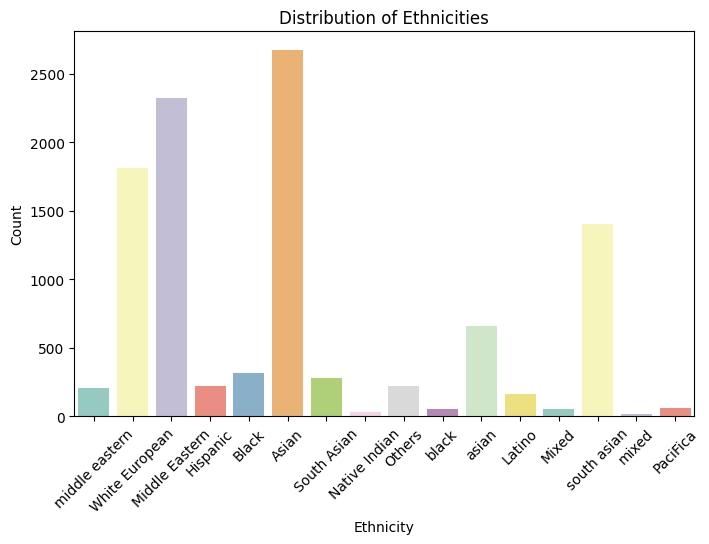

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data['Ethnicity'], palette='Set3')
plt.title('Distribution of Ethnicities')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


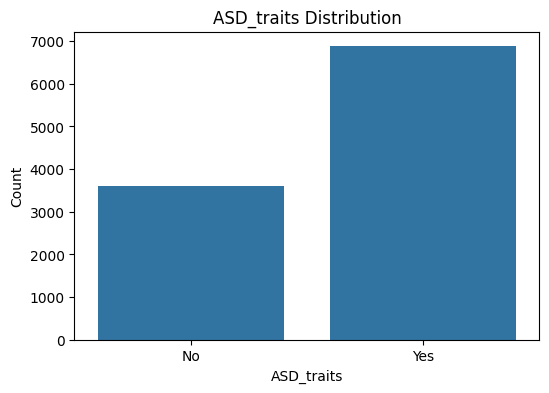

In [18]:
plt.figure(figsize=(6, 4))
title='ASD_traits'
sns.countplot(x=title, data=data)
plt.title(f'{title} Distribution')
plt.ylabel('Count')
plt.show()

Step 2:
Processing Data

Dropping some useless columns

In [19]:
data = data.drop(["CASE_NO_PATIENT'S", 'Qchat_10_Score',], axis=1)

Dealing with rows with NaN values

In [20]:
data = data.dropna(subset=['Social_Responsiveness_Scale'])

Checking if there are any NaN values in the data.


In [21]:
nan_indices = [(row, col) for row, col in zip(*data.isnull().values.nonzero())]
if(nan_indices): 
    print(nan_indices)
else:
    print("No NaN values found.")

for row, col in nan_indices:
    value = data.iloc[row, col]
    column_name = data.columns[col]
    print(f"NaN found at row {row}, column '{column_name}' with value: {value}")

No NaN values found.


Applying Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

features = data.drop('ASD_traits', axis=1) 
target = data['ASD_traits']
features=pd.get_dummies(features)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

features = pd.DataFrame(features_scaled, columns=features.columns)

Step 3:
Loading and Training the Model

In [23]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

Splitting the data into 'x' and 'y'.

In [24]:
x = data.drop(columns=['ASD_traits'])
y = data['ASD_traits']

Applying One Hot Encoding to the data.

In [25]:
X = pd.get_dummies(x)

In [49]:
print(X.columns)

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10_Autism_Spectrum_Quotient', 'Social_Responsiveness_Scale',
       'Age_Years', 'Childhood Autism Rating Scale',
       'Speech Delay/Language Disorder_No',
       'Speech Delay/Language Disorder_Yes', 'Learning disorder_No',
       'Learning disorder_Yes', 'Genetic_Disorders_No',
       'Genetic_Disorders_Yes', 'Depression_No', 'Depression_Yes',
       'Global developmental delay/intellectual disability_No',
       'Global developmental delay/intellectual disability_Yes',
       'Social/Behavioural Issues_No', 'Social/Behavioural Issues_Yes',
       'Anxiety_disorder_No', 'Anxiety_disorder_Yes', 'Sex_F', 'Sex_M',
       'Ethnicity_Asian', 'Ethnicity_Black', 'Ethnicity_Hispanic',
       'Ethnicity_Latino', 'Ethnicity_Middle Eastern', 'Ethnicity_Mixed',
       'Ethnicity_Native Indian', 'Ethnicity_Others', 'Ethnicity_PaciFica',
       'Ethnicity_South Asian', 'Ethnicity_White European', 'Ethnicity_asian',
       'Eth

Splitting the data into train and test.

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2,random_state=87)

In [27]:
print(len(X))

10428


Loading the SVM model and the Random Forest model.

In [28]:
svm_model = SVC(kernel='linear', class_weight='balanced', probability=True)  # SVM
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

Creating a voting classifier to combine the two models.

In [29]:
voting_clf = VotingClassifier(estimators=[
    ('svm', svm_model), 
    ('rf', rf_model)], voting='soft')

Training the ensemble model.

In [30]:
voting_clf.fit(X_train, Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(class_weight='balanced', kernel='linear',
                                  probability=True)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     random_state=42))],
                 voting='soft')

Step 4:
Evaluating the Model

Making predictions on the Test data

In [31]:
y_pred = voting_clf.predict(X_test)

Comparing it to the desired outcomes and understading the accuracy.

In [32]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(Y_test, y_pred))

Ensemble Model Accuracy: 82.02%

Classification Report:
               precision    recall  f1-score   support

          No       0.74      0.74      0.74       716
         Yes       0.86      0.86      0.86      1370

    accuracy                           0.82      2086
   macro avg       0.80      0.80      0.80      2086
weighted avg       0.82      0.82      0.82      2086



Step 5:
Saving the Model for application use

In [33]:
import pickle

with open('ensemble_model.pkl', 'wb') as model_file:
    pickle.dump(voting_clf, model_file)

print("Model saved successfully!")


Model saved successfully!


Loading the model, and trying it on a sample user input.

In [34]:
import pickle
import pandas as pd
import numpy as np

Loading the Model.

In [35]:
with open('ensemble_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

Configuring a sample user input.

In [36]:
user_input = {'A1': 1, 'A2': 1, 'A3': 0, 'A4': 0, 'A5': 0, 'A6': 1, 'A7': 1, 'A8': 0, 'A9': 0,
              'A10_Autism_Spectrum_Quotient': 0, 'Social_Responsiveness_Scale': 6.0, 'Age_Years': 3,
              'Speech Delay/Language Disorder': 'Yes', 'Learning disorder': 'Yes', 
              'Genetic_Disorders': 'Yes', 'Depression': 'Yes', 
              'Global developmental delay/intellectual disability': 'Yes', 'Social/Behavioural Issues': 'Yes',
              'Childhood Autism Rating Scale': 2, 'Anxiety_disorder': 'Yes', 'Sex': 'M', 
              'Ethnicity': 'White European', 'Jaundice': 'Yes', 'Family_mem_with_ASD': 'No', 
              'Who_completed_the_test': 'Family Member'}

In [37]:
input_df = pd.DataFrame([user_input])

In [38]:
input_df_encoded = pd.get_dummies(input_df)

In [39]:
missing_cols = set(X.columns) - set(input_df_encoded.columns)
for col in missing_cols:
    input_df_encoded[col] = 0
input_df_encoded = input_df_encoded[X.columns] 

In [40]:
prediction = loaded_model.predict(input_df_encoded)

In [41]:
if prediction[0]=='Yes':
    print('You are likely to have Autism.')
else:
    print('You are unlikely to have Autism.')

You are likely to have Autism.
